In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('D:\Dynamo optimizer\logs\dynamo_probe.csv')
print(df.head())

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4172\2627992035.py:4: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('D:\Dynamo optimizer\logs\dynamo_probe.csv')


   step  grad_norm  second_moment  thermostat_trigger  rayleigh_quotient  \
0     1  14.322685       0.000022                   0          -5.009248   
1     2  12.574647       0.000039                   0           3.404582   
2     3  11.642304       0.000053                   0           7.997078   
3     4  13.615431       0.000073                   0          -9.206913   
4     5  10.058815       0.000083                   0          34.865349   

   adaptive_threshold  
0                 inf  
1                 inf  
2                 inf  
3                 inf  
4                 inf  


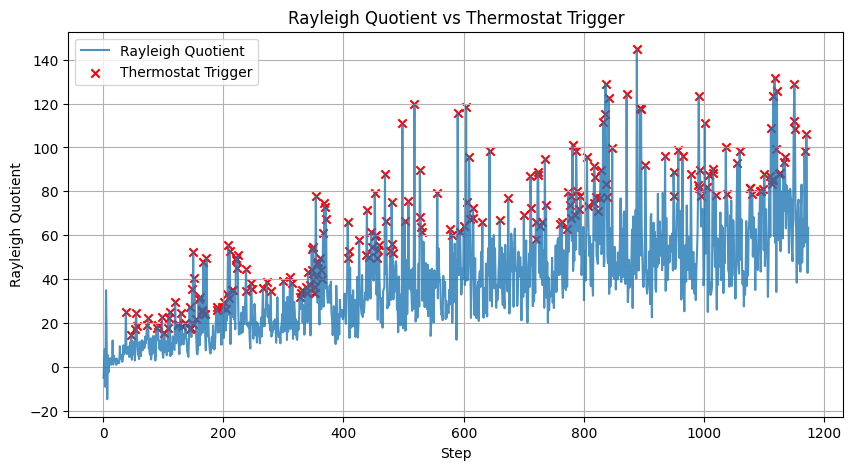

In [2]:
plt.figure(figsize=(10,5))

# Rayleigh Quotient curve
plt.plot(df["step"], df["rayleigh_quotient"], label="Rayleigh Quotient", alpha=0.8)

# Thermostat trigger as markers (only plot when it fires)
trigger_steps = df[df["thermostat_trigger"] == 1]["step"]
trigger_vals = df[df["thermostat_trigger"] == 1]["rayleigh_quotient"]

plt.scatter(trigger_steps, trigger_vals, color="red", label="Thermostat Trigger", marker="x")

plt.xlabel("Step")
plt.ylabel("Rayleigh Quotient")
plt.title("Rayleigh Quotient vs Thermostat Trigger")
plt.legend()
plt.grid(True)
plt.show()


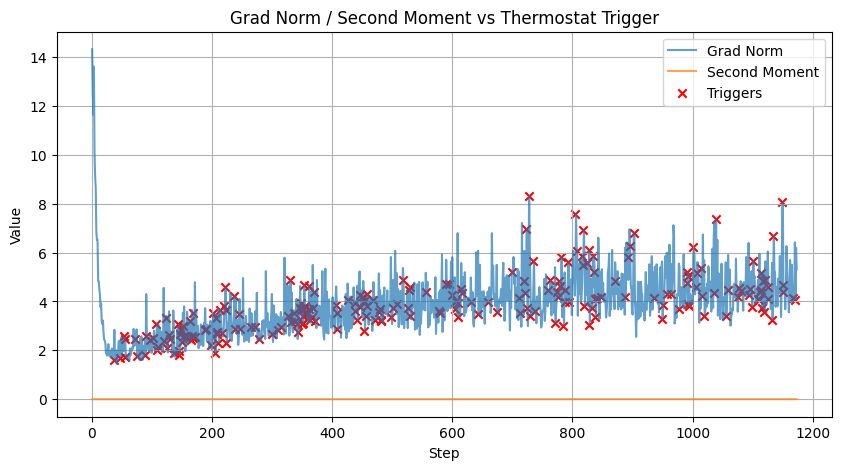

In [3]:
plt.figure(figsize=(10,5))

plt.plot(df["step"], df["grad_norm"], label="Grad Norm", alpha=0.7)
plt.plot(df["step"], df["second_moment"], label="Second Moment", alpha=0.7)
plt.scatter(trigger_steps, [df["grad_norm"][i] for i in trigger_steps], 
            color="red", marker="x", label="Triggers")

plt.xlabel("Step")
plt.ylabel("Value")
plt.title("Grad Norm / Second Moment vs Thermostat Trigger")
plt.legend()
plt.grid(True)
plt.show()


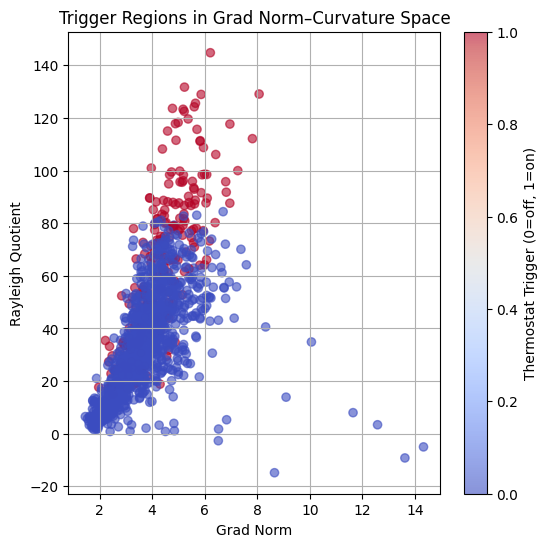

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(df["grad_norm"], df["rayleigh_quotient"], 
            c=df["thermostat_trigger"], cmap="coolwarm", alpha=0.6)

plt.xlabel("Grad Norm")
plt.ylabel("Rayleigh Quotient")
plt.title("Trigger Regions in Grad Norm–Curvature Space")
plt.colorbar(label="Thermostat Trigger (0=off, 1=on)")
plt.grid(True)
plt.show()


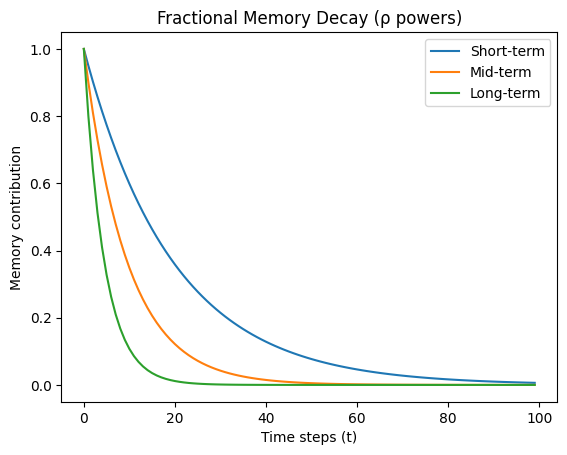

In [1]:
import matplotlib.pyplot as plt

memory_influence = []
for i, rho in enumerate([0.95, 0.9, 0.8]):
    influence = [(rho)**t for t in range(100)]
    memory_influence.append(influence)

for inf in memory_influence:
    plt.plot(inf)
plt.legend(["Short-term", "Mid-term", "Long-term"])
plt.title("Fractional Memory Decay (ρ powers)")
plt.xlabel("Time steps (t)")
plt.ylabel("Memory contribution")
plt.show()
